<a href="https://colab.research.google.com/github/HussnainAhmedSaqib/Genism_Example/blob/main/Word_and_text_similarity(GENISM).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from sklearn.decomposition import PCA
from gensim.test.utils import datapath, get_tmpfile
from gensim.models import KeyedVectors
from gensim.scripts.glove2word2vec import glove2word2vec

In [2]:
! wget http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip

--2021-07-30 14:13:45--  http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glove.6B.zip        100%[===================>] 822.24M  5.02MB/s    in 2m 40s  

2021-07-30 14:16:25 (5.14 MB/s) - ‘glove.6B.zip’ saved [862182613/862182613]



In [3]:
! unzip glove.6B.zip

Archive:  glove.6B.zip
  inflating: glove.6B.50d.txt        
  inflating: glove.6B.100d.txt       
  inflating: glove.6B.200d.txt       
  inflating: glove.6B.300d.txt       


In [4]:
glove_file = datapath('/content/glove.6B.100d.txt')
word2vec_glove_file = get_tmpfile("glove.6B.100d.word2vec.txt")
glove2word2vec(glove_file, word2vec_glove_file)

(400000, 100)

In [5]:
model = KeyedVectors.load_word2vec_format(word2vec_glove_file)

In [6]:
model.most_similar('obama')

[('barack', 0.937216579914093),
 ('bush', 0.927285373210907),
 ('clinton', 0.8960003852844238),
 ('mccain', 0.8875633478164673),
 ('gore', 0.8000321388244629),
 ('hillary', 0.7933663129806519),
 ('dole', 0.7851964235305786),
 ('rodham', 0.751889705657959),
 ('romney', 0.7488929629325867),
 ('kerry', 0.7472623586654663)]

In [7]:
model.most_similar('beyonce')

[('knowles', 0.756720781326294),
 ('beyoncé', 0.7488903999328613),
 ('mariah', 0.7182251214981079),
 ('rihanna', 0.6848837733268738),
 ('blige', 0.6664831042289734),
 ('timberlake', 0.6549240350723267),
 ('kanye', 0.6457836031913757),
 ('gaga', 0.6442339420318604),
 ('britney', 0.6408397555351257),
 ('shakira', 0.6334984302520752)]

In [8]:
model.most_similar(negative='gaga')

[('keyrates', 0.6920512914657593),
 ('zety', 0.6845954656600952),
 ('sungrebe', 0.6816296577453613),
 ('ryryryryryry', 0.6706271171569824),
 ('paeonians', 0.6693204641342163),
 ('yakshas', 0.6673578023910522),
 ('finfoots', 0.6668466329574585),
 ('metapontum', 0.6645209789276123),
 ('mackintoshes', 0.6639569997787476),
 ('tencteri', 0.6619848608970642)]

In [9]:
result = model.most_similar(positive=['woman', 'king'], negative=['man'])
print("{}: {:.4f}".format(*result[0]))

queen: 0.7699


In [10]:
def analogy(x1, x2, y1):
    result = model.most_similar(positive=[y1, x2], negative=[x1])
    return result[0][0]

In [11]:
analogy('pakistan','pakistani','india')

'indian'

In [12]:
analogy('football','footballer','cricket')

'cricketer'

In [13]:
analogy('pakistan','urdu','india')

'bengali'

In [14]:
analogy('islam','muslims','christianity')

'christians'

In [15]:
print(model.doesnt_match("breakfast cereal dinner lunch".split()))

cereal


/usr/local/lib/python3.7/dist-packages/gensim/models/keyedvectors.py:895: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  vectors = vstack(self.word_vec(word, use_norm=True) for word in used_words).astype(REAL)


In [16]:
print(model.doesnt_match("soccer volleyball basketball swimming".split()))

swimming


/usr/local/lib/python3.7/dist-packages/gensim/models/keyedvectors.py:895: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  vectors = vstack(self.word_vec(word, use_norm=True) for word in used_words).astype(REAL)


In [17]:
def display_pca_scatterplot(model, words=None, sample=0):
    if words == None:
        if sample > 0:
            words = np.random.choice(list(model.vocab.keys()), sample)
        else:
            words = [ word for word in model.vocab ]
        
    word_vectors = np.array([model[w] for w in words])

    twodim = PCA().fit_transform(word_vectors)[:,:2]
    
    plt.figure(figsize=(6,6))
    plt.scatter(twodim[:,0], twodim[:,1], edgecolors='k', c='r')
    for word, (x,y) in zip(words, twodim):
        plt.text(x+0.05, y+0.05, word)

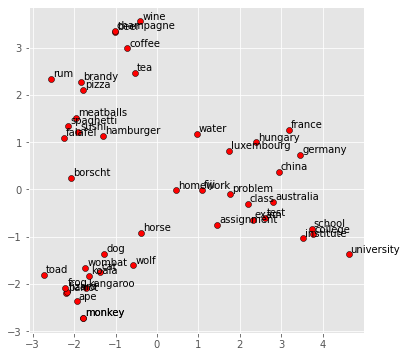

In [18]:
display_pca_scatterplot(model, 
                        ['coffee', 'tea', 'beer', 'wine', 'brandy', 'rum', 'champagne', 'water',
                         'spaghetti', 'borscht', 'hamburger', 'pizza', 'falafel', 'sushi', 'meatballs',
                         'dog', 'horse', 'cat', 'monkey', 'parrot', 'koala', 'lizard',
                         'frog', 'toad', 'monkey', 'ape', 'kangaroo', 'wombat', 'wolf',
                         'france', 'germany', 'hungary', 'luxembourg', 'australia', 'fiji', 'china',
                         'homework', 'assignment', 'problem', 'exam', 'test', 'class',
                         'school', 'college', 'university', 'institute'])

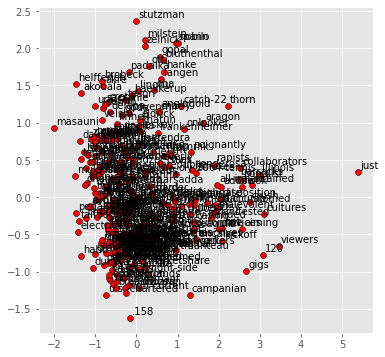

In [19]:
display_pca_scatterplot(model, sample=300)